In [101]:
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt

In [102]:
def collect_spectrum(pickle_path: str) -> np.ndarray:
    with open(pickle_path, "rb") as f:
        data = pickle.load(f)
    
    evals = data["eigenvalues"]
    evals_Gamma = evals[0]
    evals_K = evals[-1]
    evals_others = np.sort(np.concatenate(evals[1:-1]))
    
    return {
        "Gamma": np.sort(np.array(evals_Gamma)),
        "K": np.sort(np.array(evals_K)),
        "others": evals_others
    }

    # all_eigenvalues = []
    
    # for sector_evals in data["eigenvalues"]:
    #     all_eigenvalues.extend(sector_evals)
    
    # return np.sort(np.array(all_eigenvalues))

In [103]:
def gether_files(data_root: str) -> list[float]:
    pairs = []
    for name in os.listdir(data_root):
        if name.startswith("ed_spectrum_"):
            parts = name.split("_")
            sigma = float(parts[4])
            pairs.append((sigma, name))
    sorted_pairs = sorted(pairs, key=lambda x: x[0])
    sigmas = [pair[0] for pair in sorted_pairs]
    filenames = [pair[1] for pair in sorted_pairs]
    return sigmas, filenames

In [104]:
DATA_ROOT = "/home/cwpark/acband-laughlin-instability/data/solenoid_m_7"
sigmas, filenames = gether_files(DATA_ROOT)
sigmas

[0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, inf]

In [105]:
sigmas[-1] = 1.1

In [106]:
spectrums_Gamma = []
spectrums_K = []
spectrums_others = []

for sigma, filename in zip(sigmas, filenames):
    spectrum = collect_spectrum(os.path.join(DATA_ROOT, filename))
    spectrums_Gamma.append(spectrum["Gamma"] - spectrum["Gamma"][0])
    spectrums_K.append(spectrum["K"] - spectrum["K"][0])
    spectrums_others.append(spectrum["others"] - spectrum["others"][0])

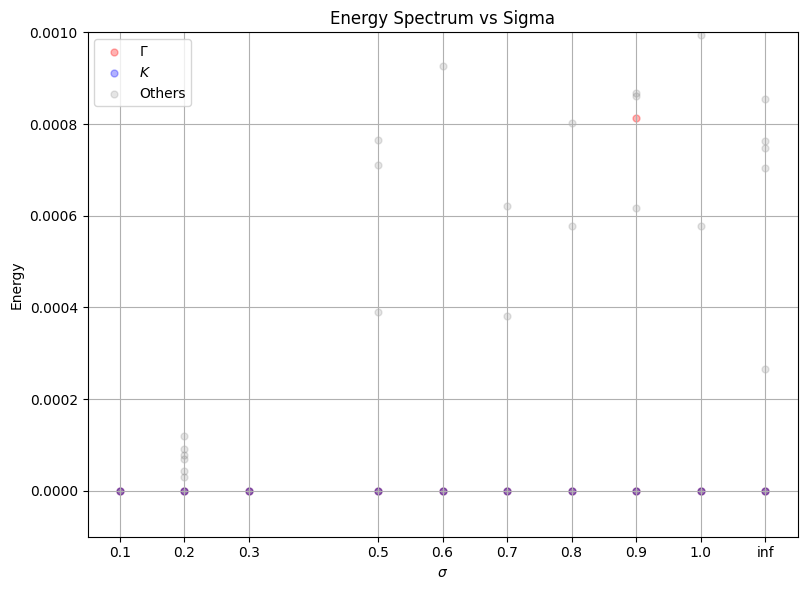

In [111]:
plt.figure(figsize=(8, 6))
for i, (sigma, spectrum) in enumerate(zip(sigmas, spectrums_Gamma)):
    plt.scatter(
        np.full_like(spectrum, sigma),
        spectrum,
        s=25,
        c='r',
        alpha=0.3,
        label=r"$\Gamma$" if i == 0 else "_nolegend_"
    )
for i, (sigma, spectrum) in enumerate(zip(sigmas, spectrums_K)):
    plt.scatter(
        np.full_like(spectrum, sigma),
        spectrum,
        s=25,
        c='b',
        alpha=0.3,
        label=r"$K$" if i == 0 else "_nolegend_"
    )
for i, (sigma, spectrum) in enumerate(zip(sigmas, spectrums_others)):
    plt.scatter(
        np.full_like(spectrum, sigma),
        spectrum,
        s=25,
        c='k',
        alpha=0.1,
        label="Others" if i == 0 else "_nolegend_"
    )
plt.xlabel("$\\sigma$")
plt.ylabel("Energy")
plt.title("Energy Spectrum vs Sigma")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.ylim(-0.0001, 0.001)

# Set x-ticks to match the sigma values and replace the last label with 'inf'
tick_labels = [str(s) for s in sigmas]
tick_labels[-1] = "inf"
plt.xticks(sigmas, tick_labels)

plt.show()

In [108]:
idx = 9
full_spec = np.concatenate((spectrums_Gamma[idx], spectrums_K[idx], spectrums_others[idx]))
full_spec = np.sort(full_spec)

In [109]:
full_spec

array([0.        , 0.        , 0.        , 0.00026583, 0.00070332,
       0.00074777, 0.00076214, 0.0008542 , 0.00133956, 0.00195532,
       0.00267188, 0.00267492, 0.00284196, 0.00285975, 0.00308129,
       0.00314197, 0.00330575, 0.00338398, 0.0036215 , 0.00368997,
       0.00373191, 0.00373874, 0.00399612, 0.00433544, 0.00439104,
       0.00439341, 0.00439748, 0.00448764, 0.00459012, 0.00466186,
       0.00496987, 0.0049943 , 0.00504151, 0.0052114 , 0.00522388,
       0.00546261, 0.0055476 , 0.00556488, 0.00584264, 0.00588601,
       0.00601825, 0.0063599 , 0.00638102, 0.00649724, 0.00653591,
       0.00672644, 0.00692154, 0.00695257, 0.00708925, 0.00723328,
       0.00727785, 0.0072862 , 0.00733506, 0.00734043, 0.00743392,
       0.00750253, 0.00750582, 0.00756684, 0.00770332, 0.00773056,
       0.00774454, 0.00786746, 0.00787207, 0.00790442, 0.00791595,
       0.00795547, 0.00796553, 0.00797638, 0.00808504, 0.00812113,
       0.0081676 , 0.0081707 , 0.00817358, 0.00817488, 0.00823

In [110]:
print("Gamma")
for idx in range(0, 11):
    print(spectrums_Gamma[idx][:3])

print("K")
for idx in range(0, 11):
    print(spectrums_K[idx][:3])

print("Others")
for idx in range(0, 11):
    print(spectrums_others[idx][:3])


Gamma
[0.         0.00571632 0.00971269]
[0.         0.00559328 0.0086699 ]
[0.         0.02243665 0.0283255 ]
[0.         0.00567319 0.00855651]
[0.         0.00168644 0.00581791]
[0.         0.00269673 0.00727179]
[0.         0.00233295 0.00677633]
[0.         0.0008134  0.00402538]
[0.         0.00389281 0.00516962]
[0.         0.00267492 0.00314197]


IndexError: list index out of range